Advertising Sales Channel Prediction
Problem Statement:
Sales Channel Prediction Case Study  

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  

In [47]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv")

In [3]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
df=df.drop(columns=('Unnamed: 0'))

In [7]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
df.shape

(200, 4)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [11]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

1. There is no missing value in the data set.



<AxesSubplot:>

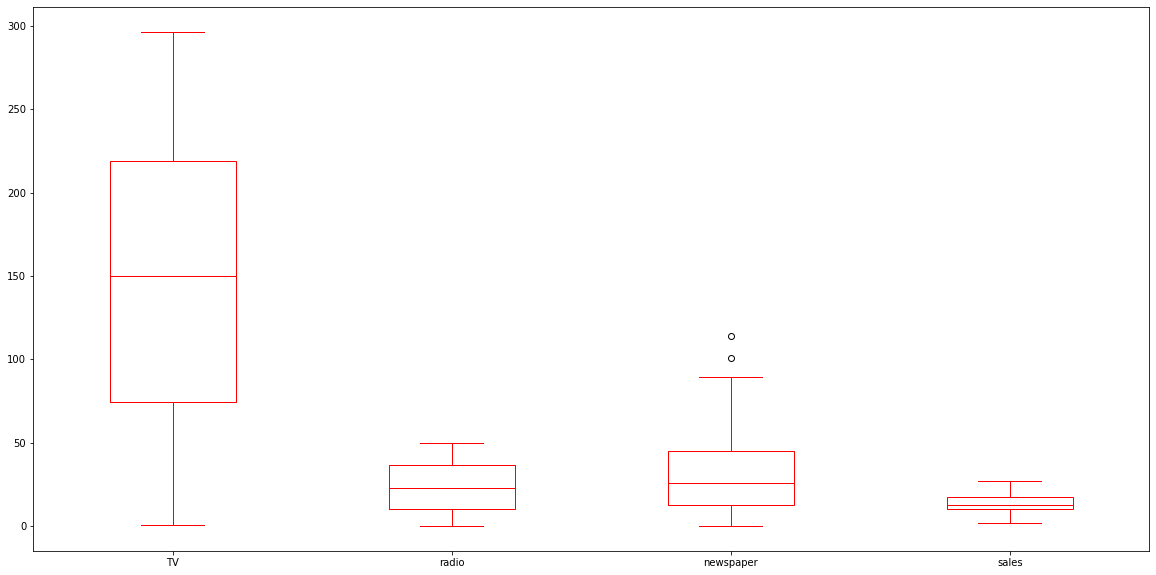

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
df.plot(kind='box', figsize=(20,10), color='r')

From the box plot we can see few outliers in newspaper

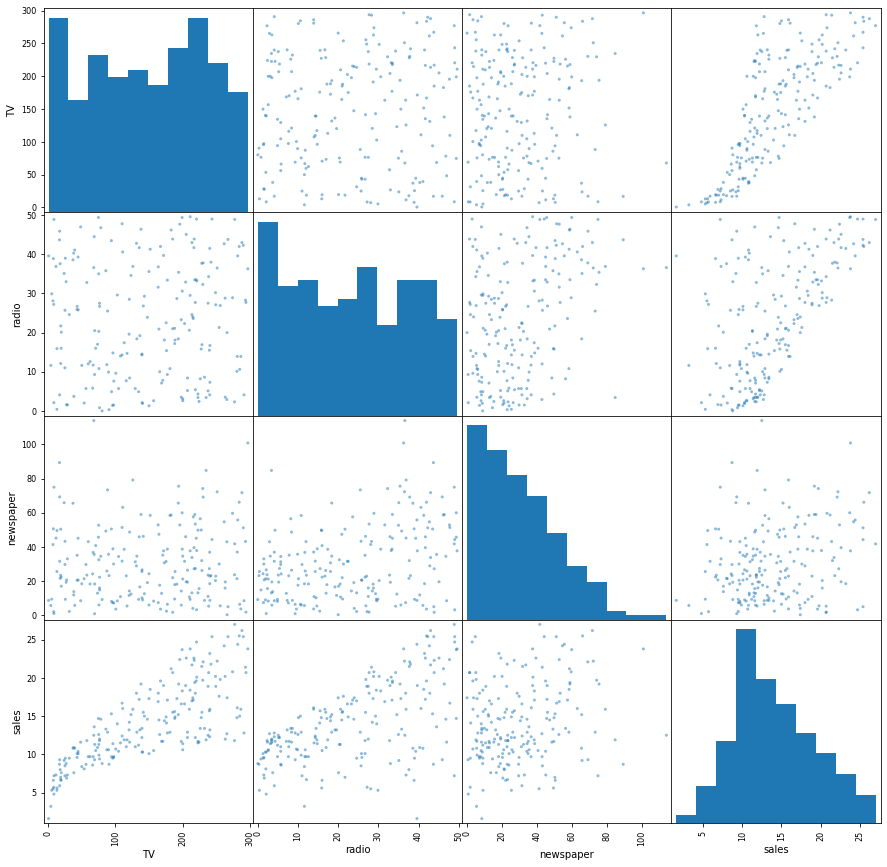

In [13]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(15,15))
plt.show()

From the scatter matrix it can be seen that there is some linear relation between, sales and TV, Radio and newspaper.
There is no interrealtion between Tv, radio and newspaper

In [16]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

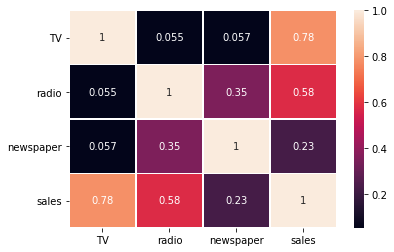

In [17]:
sns.heatmap(df.corr(),annot=True, linewidth=0.5)

From the above heat map it can be seen that there is strong relation between Tv and Sales, followed by radio and than newspaper.
The problem is regression problem.
We can remove outliers from newspaper.
Sales is the label, TV, newpaper and radio will be the feature.

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='newspaper', ylabel='Density'>

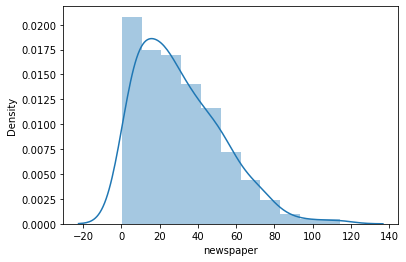

In [18]:
sns.distplot(df["newspaper"])

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='radio', ylabel='Density'>

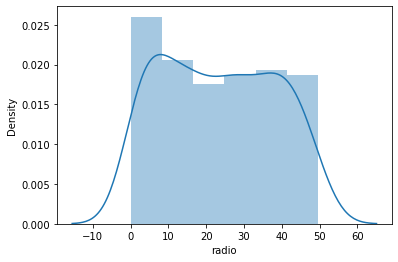

In [19]:
sns.distplot(df["radio"])

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TV', ylabel='Density'>

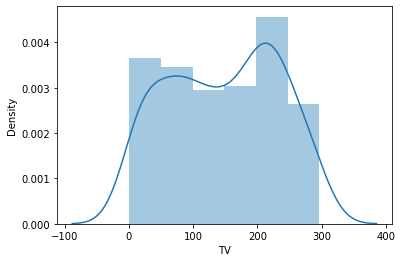

In [20]:
sns.distplot(df["TV"])

In [23]:
q3=df.quantile(0.75)
q3

TV           218.825
radio         36.525
newspaper     45.100
sales         17.400
Name: 0.75, dtype: float64

In [25]:
q1=df.quantile(0.25)
q1

TV           74.375
radio         9.975
newspaper    12.750
sales        10.375
Name: 0.25, dtype: float64

In [28]:
iqr=q3-q1
iqr

TV           144.450
radio         26.550
newspaper     32.350
sales          7.025
dtype: float64

In [30]:
np_high=(q3.newspaper+(1.5*iqr.newspaper))
np_high

93.625

In [31]:
index=np.where(df['newspaper']>np_high)
index

(array([ 16, 101], dtype=int64),)

In [37]:
df=df.drop(df.index[index])

In [36]:
df.reset_index()

,index,TV,radio,newspaper,sales
0,0,230.1,37.8,69.2,22.1
1,1,44.5,39.3,45.1,10.4
2,2,17.2,45.9,69.3,9.3
3,3,151.5,41.3,58.5,18.5
4,4,180.8,10.8,58.4,12.9
...,...,...,...,...,...
192,195,38.2,3.7,13.8,7.6
193,196,94.2,4.9,8.1,9.7
194,197,177.0,9.3,6.4,12.8
195,198,283.6,42.0,66.2,25.5


<AxesSubplot:>

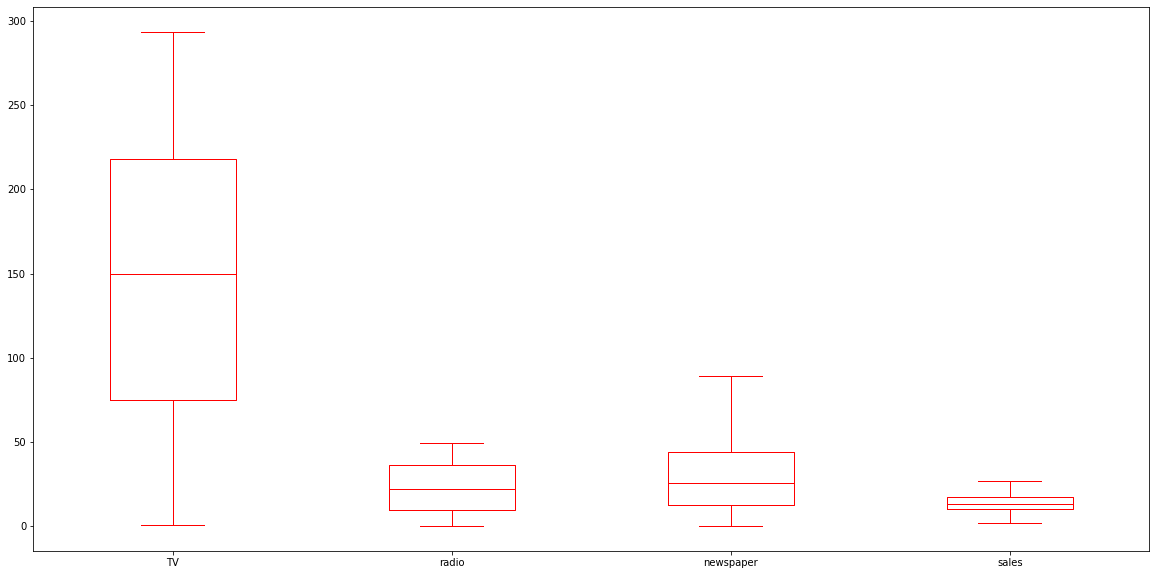

In [38]:
df.plot(kind='box', figsize=(20,10), color='r')

Now the data-set looks clean

In [40]:
x=df.drop(columns=['sales'])
y=df['sales']

In [41]:
scaler=StandardScaler()
x_scaled= scaler.fit_transform(x)
x_scaled

array([[ 0.99145097,  0.99523652,  1.93241612],
       [-1.19464587,  1.09612256,  0.74955848],
       [-1.51619999,  1.54002116,  1.93732424],
       [ 0.0656578 ,  1.23063729,  1.40724696],
       [ 0.410769  , -0.82071228,  1.40233884],
       [-1.61631757,  1.74179325,  2.21708726],
       [-1.04152487,  0.6589497 , -0.31059609],
       [-0.30301047, -0.22884749, -0.89466273],
       [-1.61749542, -1.40585134, -1.41492377],
       [ 0.63456124, -1.37222266, -0.42348292],
       [-0.94022943, -1.1569991 , -0.27623923],
       [ 0.81006147,  0.06708491, -1.26768008],
       [-1.43846163,  0.81364164,  1.77044806],
       [-0.5703833 , -1.03593585, -1.11062014],
       [ 0.68520896,  0.66567544,  0.79373158],
       [ 0.58273567,  1.66108441,  1.13239207],
       [ 0.01618794,  0.06035917, -0.5265535 ],
       [ 0.85364207,  0.31593715,  1.15693269],
       [ 1.07743431, -1.20407925, -0.31059609],
       [-1.56331414, -0.47769973,  0.97042401],
       [ 0.9702496 , -0.41044237, -0.178

In [45]:
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled, i) for i in range (x_scaled.shape[1])]
vif['features']=x.columns
vif

,vif,features
0,1.002597,TV
1,1.138397,radio
2,1.138934,newspaper


In [46]:
##vif is less than 5: no multicollinearity..also seen in heatmap.

1. split data in train-test
2. applying linear regression

In [52]:
x_train, x_test, y_train, y_test= train_test_split(x_scaled,y,test_size=0.25, random_state=323)


In [53]:
regression=LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

In [54]:
regression.score(x_train,y_train)

0.9066288030469988

In [55]:
regression.score(x_test,y_test)

0.8500173107953324

In [56]:
y_pred=regression.predict(x_test)
y_pred

array([14.1935656 , 18.52637852, 14.47316682, 12.73729571, 24.55069994,
       15.72533975, 13.75144664, 12.04492967, 20.7024706 , 11.08286256,
       17.69702759, 10.78514932, 13.82411965, 16.2398764 , 10.16221679,
       10.94874605, 14.97676577, 10.72420695, 11.84812354, 13.03000622,
       12.05566864, 12.33272414, 15.80970128, 14.14488583,  6.7700652 ,
       20.95526551, 23.16921033,  9.72394168, 14.49755171, 10.0517866 ,
       19.1085621 , 18.25427726,  9.93675962, 13.60515118,  5.6957067 ,
       13.21271977,  7.65197003, 11.02264917,  8.372034  , 15.22621098,
        5.62624727, 17.68931659, 19.97477289, 14.77250377, 11.69280964,
       21.85665487, 23.48634507, 14.32820543, 10.40255652])

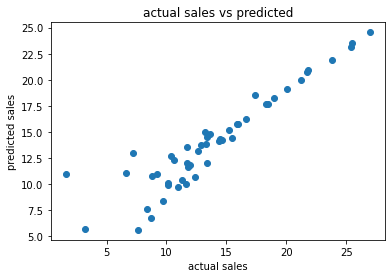

In [57]:
plt.scatter(y_test,y_pred)
plt.xlabel("actual sales")
plt.ylabel("predicted sales")
plt.title("actual sales vs predicted")
plt.show()

In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [59]:
y_pred= regression.predict(x_test)

In [60]:
mean_absolute_error(y_test, y_pred)

1.431450994202026

In [61]:
mean_squared_error(y_test, y_pred)

4.513170891119661

In [62]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.124422484140022

Now lets try KNN Model building technique

In [63]:
from sklearn.neighbors import KNeighborsRegressor

In [64]:
knn= KNeighborsRegressor()

In [66]:
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [68]:
y_pred= knn.predict(x_test)
y_pred

array([14.22, 17.76, 15.56, 11.48, 23.98, 16.36, 12.8 , 12.48, 22.88,
        8.28, 18.48,  9.12, 14.24, 15.68,  9.14,  8.9 , 12.64, 11.48,
       12.1 , 11.76, 11.42, 12.  , 15.84, 14.08,  7.42, 21.96, 22.38,
       10.74, 13.58, 10.8 , 19.96, 18.78, 10.44, 12.82,  7.64, 13.46,
        8.68,  9.46,  8.68, 15.7 ,  8.36, 18.42, 19.84, 15.86, 11.94,
       22.84, 24.02, 14.74, 10.72])

In [69]:

knn.score(x_train,y_train)

0.9573243207103924

In [70]:
knn.score(x_test, y_test)

0.9037293776149092

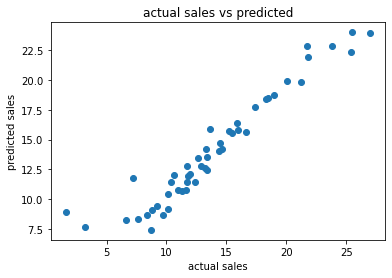

In [71]:
plt.scatter(y_test,y_pred)
plt.xlabel("actual sales")
plt.ylabel("predicted sales")
plt.title("actual sales vs predicted")
plt.show()

In [72]:
##  the accuracy score has increased , also the scatter plot.

In [75]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf = clf.fit(x_train, y_train)

In [76]:
clf = clf.fit(x_train, y_train)

In [77]:
clf.score(x_train, y_train)

1.0

In [78]:
clf.score(x_test, y_test)

0.9142201791688651

In [83]:
y_pred= clf.predict(x_test)
y_pred

array([17. , 15.9, 14.2, 10.8, 25.4, 14.2, 13.4, 11.9, 22.6,  9.3, 19.2,
        8.5, 14. , 17.6,  9.6,  9.3, 12.3, 12.2, 10.9,  9.3, 11.7, 11.5,
       17.2, 14.9,  8.1, 25.4, 25.4, 11. , 13.4, 11. , 19.6, 19.6, 10.5,
       11.4,  5.7, 11.8,  9.7,  8.5,  9.7, 15. ,  9.4, 18.4, 20.7, 14.7,
       10.9, 23.7, 26.2, 14.9, 10.9])

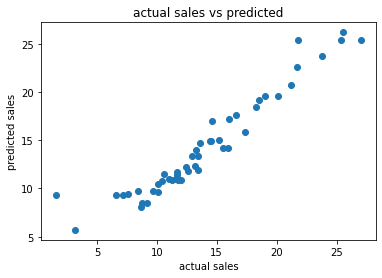

In [84]:
plt.scatter(y_test,y_pred)
plt.xlabel("actual sales")
plt.ylabel("predicted sales")
plt.title("actual sales vs predicted")
plt.show()

In [89]:
## accuracy score increased to 91%

In [111]:
import pickle

In [114]:
filename='advertising sales.pickle'
pickle.dump(clf,open(filename,'wb'))